# Project 1 - NLP - MBTI Dataset

Here, we'll find a model to predict MBTI type of a person based on their typing.

Dataset from Kaggle: https://www.kaggle.com/datasets/datasnaek/mbti-type

## Look at the data

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_csv("mbti_1.csv")
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


No missing values in our dataset

In [125]:
df.shape

(8675, 2)

## Pre-Processing Steps:

- Expand contractions
- Noise cleaning
- Remove stopwords

##### Expand Contractions

In [126]:
# Contraction Mapping
import contractions

df['posts'] = df['posts'].apply(lambda x: [contractions.fix(word) for word in x.split(' ')])
df.head()

,type,posts
0,INFJ,['http://www.youtube.com/watch?v=qsXHcwe3krw||...
1,ENTP,"['I am, finding, the, lack, of, me, in, these,..."
2,INTP,"['Good, one, , _____, , , https://www.youtube...."
3,INTJ,"['Dear, INTP,, , , I, enjoyed, our, conversati..."
4,ENTJ,"['You are, fired.|||That is, another, silly, m..."


In [127]:
#joining back the list of items into one string
df['posts'] = [' '.join(map(str, l)) for l in df['posts'] ]

df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I am finding the lack of me in these posts ve...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You are fired.|||That is another silly miscon...


##### Noise Cleaning

In [128]:
# Noise Cleaning - spacing, special characters, lowercasing 
import regex as re

df['posts'] = df['posts'].str.lower()
df['posts'] = df['posts'].apply(lambda x: re.sub(r'[^\w\d\s]+', '', x))

df.head()

,type,posts
0,INFJ,httpwwwyoutubecomwatchvqsxhcwe3krwhttp41mediat...
1,ENTP,i am finding the lack of me in these posts ver...
2,INTP,good one _____ httpswwwyoutubecomwatchvfhig...
3,INTJ,dear intp i enjoyed our conversation the oth...
4,ENTJ,you are firedthat is another silly misconcepti...


In [129]:
#turn out that we need to get rid of unnecessary link included in posts 

df['posts'] = df['posts'].apply(lambda x: re.sub("http[s]?[\w]+", '', x))

df.head()

,type,posts
0,INFJ,and intj moments sportscenter not top ten ...
1,ENTP,i am finding the lack of me in these posts ver...
2,INTP,good one _____ course to which i say i kno...
3,INTJ,dear intp i enjoyed our conversation the oth...
4,ENTJ,you are firedthat is another silly misconcepti...


In [130]:
#turn out that we need to get rid of unnecessary underscore

df['posts'] = df['posts'].apply(lambda x: re.sub("[\_]+", '', x))

df.head()

,type,posts
0,INFJ,and intj moments sportscenter not top ten ...
1,ENTP,i am finding the lack of me in these posts ver...
2,INTP,good one course to which i say i know tha...
3,INTJ,dear intp i enjoyed our conversation the oth...
4,ENTJ,you are firedthat is another silly misconcepti...


In [131]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to C:\Users\HP
[nltk_data]     14S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP 14S\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\HP
[nltk_data]     14S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [132]:
#nltk tokenization

df['posts_tokenize'] = df['posts'].apply(word_tokenize)

df.head()

,type,posts,posts_tokenize
0,INFJ,and intj moments sportscenter not top ten ...,"[and, intj, moments, sportscenter, not, top, t..."
1,ENTP,i am finding the lack of me in these posts ver...,"[i, am, finding, the, lack, of, me, in, these,..."
2,INTP,good one course to which i say i know tha...,"[good, one, course, to, which, i, say, i, know..."
3,INTJ,dear intp i enjoyed our conversation the oth...,"[dear, intp, i, enjoyed, our, conversation, th..."
4,ENTJ,you are firedthat is another silly misconcepti...,"[you, are, firedthat, is, another, silly, misc..."


#### Visualizations

In [133]:
# initializing Stop words libraries

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\HP
[nltk_data]     14S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [134]:
# Before removing checking occurances of stopwords in article content

%matplotlib inline
from matplotlib import pyplot as plt

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.figure(figsize=(10,10))
    plt.bar(x,y)

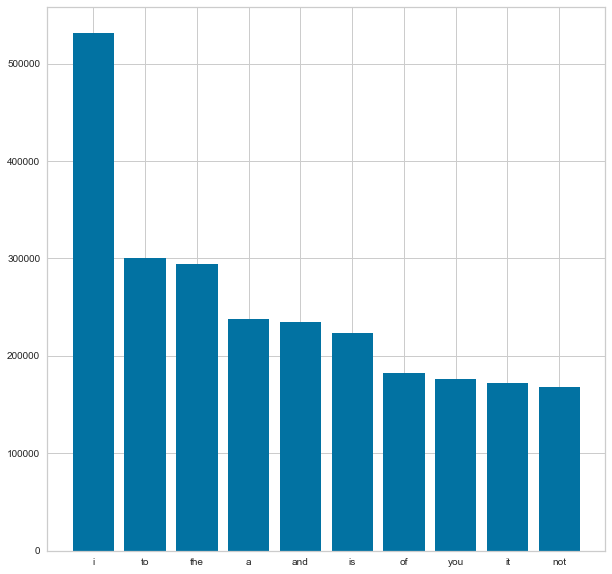

In [135]:
plot_top_stopwords_barchart(df['posts'])

In [136]:
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

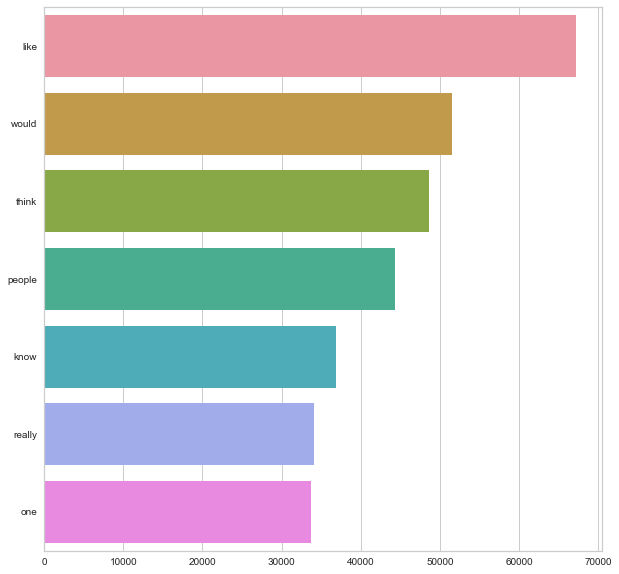

In [137]:
plot_top_non_stopwords_barchart(df['posts'])

### Remove stopwords 

In [138]:
# Now we remove stopwords 

df['posts_tokenize'] = df['posts_tokenize'].apply(lambda x: [word for word in x if word not in stop_words])
df['posts_tokenize_join'] = [' '.join(map(str, l)) for l in df['posts_tokenize']]

df.head()

,type,posts,posts_tokenize,posts_tokenize_join
0,INFJ,and intj moments sportscenter not top ten ...,"[intj, moments, sportscenter, top, ten, plays,...",intj moments sportscenter top ten plays pranks...
1,ENTP,i am finding the lack of me in these posts ver...,"[finding, lack, posts, alarmingsex, boring, po...",finding lack posts alarmingsex boring position...
2,INTP,good one course to which i say i know tha...,"[good, one, course, say, know, blessing, curse...",good one course say know blessing cursedoes ab...
3,INTJ,dear intp i enjoyed our conversation the oth...,"[dear, intp, enjoyed, conversation, day, esote...",dear intp enjoyed conversation day esoteric ga...
4,ENTJ,you are firedthat is another silly misconcepti...,"[firedthat, another, silly, misconception, app...",firedthat another silly misconception approach...


In [139]:
# Let's evaluate the POS tags for our train set data
tagged_stanzas_df = []
tagged_df = []

for word in df['posts_tokenize']:
  tagged_word = nltk.pos_tag(word)
  tagged_stanzas_df.append(tagged_word)

# This format is needed for below visualizer as in takes only two values. If you skip this format, it might give you - "too many values to unpack error" 
tagged_df.append(tagged_stanzas_df)

### Yellow Brick: POS Visualizer 

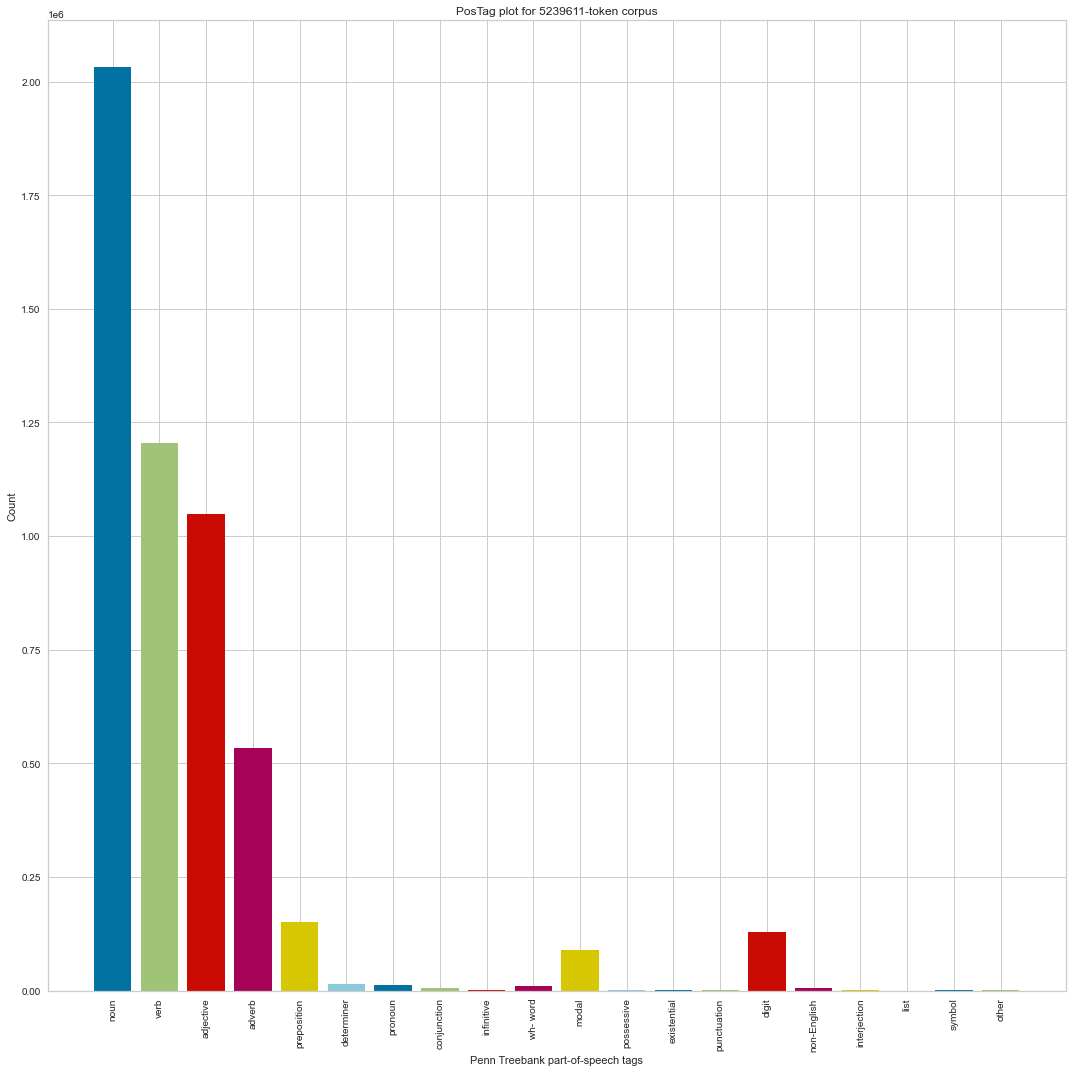

<AxesSubplot:title={'center':'PosTag plot for 5239611-token corpus'}, xlabel='Penn Treebank part-of-speech tags', ylabel='Count'>

In [140]:
# Create the visualizer for train test

from yellowbrick.text import PosTagVisualizer

plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged_df)
viz.show()

## Text Classification Methodology 

In [141]:
# now, let's check data distribution on the target label

df["type"].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

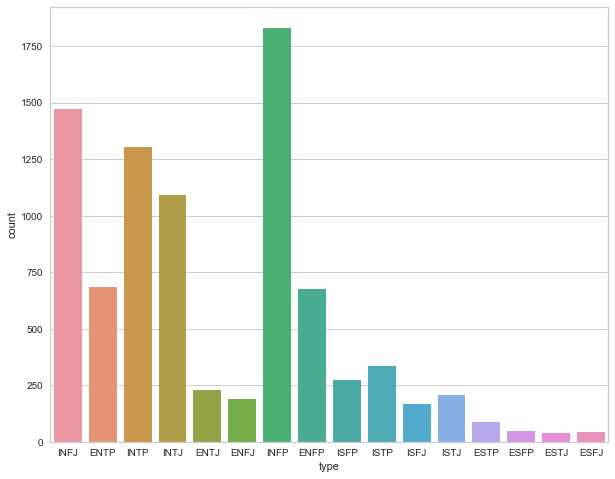

In [142]:
# we see there is skewness distribution of target features
from matplotlib import rcParams

rcParams["figure.figsize"] = 10,8
sns.countplot(x = df["type"])

### Fix Skewness Distribution of Target Label: Type

#### Oversampling 

In [143]:
count_class_0 = len(df[df['type'] == 'INFP'])
count_class_0

1832

In [144]:
# Divide by class
df_class_0 = df[df['type'] == 'INFP']
df_class_1 = df[df['type'] == 'INFJ']
df_class_2 = df[df['type'] == 'INTP']
df_class_3 = df[df['type'] == 'INTJ']
df_class_4 = df[df['type'] == 'ENTP']
df_class_5 = df[df['type'] == 'ENFP']
df_class_6 = df[df['type'] == 'ISTP']
df_class_7 = df[df['type'] == 'ISFP']
df_class_8 = df[df['type'] == 'ENTJ']
df_class_9 = df[df['type'] == 'ISTJ']
df_class_10 = df[df['type'] == 'ENFJ']
df_class_11 = df[df['type'] == 'ISFJ']
df_class_12 = df[df['type'] == 'ESTP']
df_class_13 = df[df['type'] == 'ESFP']
df_class_14 = df[df['type'] == 'ESFJ']
df_class_15 = df[df['type'] == 'ESTJ']

In [145]:
df_class_0_sam = df_class_1.sample(600, replace=True)
df_class_1_sam = df_class_1.sample(600, replace=True)
df_class_2_sam = df_class_2.sample(600, replace=True)
df_class_3_sam = df_class_3.sample(600, replace=True)
df_class_4_sam = df_class_4.sample(600, replace=True)
df_class_5_sam = df_class_5.sample(600, replace=True)
df_class_6_sam = df_class_6.sample(600, replace=True)
df_class_7_sam = df_class_7.sample(600, replace=True)
df_class_8_sam = df_class_8.sample(600, replace=True)
df_class_9_sam = df_class_9.sample(600, replace=True)
df_class_10_sam = df_class_10.sample(600, replace=True)
df_class_11_sam = df_class_11.sample(600, replace=True)
df_class_12_sam = df_class_12.sample(600, replace=True)
df_class_13_sam = df_class_13.sample(600, replace=True)
df_class_14_sam = df_class_14.sample(600, replace=True)
df_class_15_sam = df_class_15.sample(600, replace=True)

In [146]:
df_resampled = pd.concat([df_class_0, df_class_1_over, df_class_2_over, df_class_3_over, df_class_4_over, df_class_5_over, 
           df_class_6_over, df_class_7_over, df_class_8_over, df_class_9_over, df_class_10_over, df_class_11_over,
            df_class_12_over, df_class_13_over, df_class_14_over, df_class_15_over])
df_resampled.head()

,type,posts,posts_tokenize,posts_tokenize_join
17,INFP,i think we do agree i personally do not consid...,"[think, agree, personally, consider, alpha, be...",think agree personally consider alpha beta fox...
19,INFP,that is normal it happens also to me if i am i...,"[normal, happens, also, high, mood, act, like,...",normal happens also high mood act like 478 dep...
23,INFP,45016 urh sorry uh could not resistall of you ...,"[45016, urh, sorry, uh, could, resistall, enfj...",45016 urh sorry uh could resistall enfjs pleas...
25,INFP,personally i was thinking this would be more o...,"[personally, thinking, would, sj, type, job, w...",personally thinking would sj type job waysi is...
28,INFP,basically my main questions are what do you b...,"[basically, main, questions, believe, values, ...",basically main questions believe values matter...


In [147]:
target = df_resampled['type'].values

# Drop the 'type' column from df_resampled
df_resampled.drop("type", axis=1, inplace = True)
df_resampled.head()

,posts,posts_tokenize,posts_tokenize_join
17,i think we do agree i personally do not consid...,"[think, agree, personally, consider, alpha, be...",think agree personally consider alpha beta fox...
19,that is normal it happens also to me if i am i...,"[normal, happens, also, high, mood, act, like,...",normal happens also high mood act like 478 dep...
23,45016 urh sorry uh could not resistall of you ...,"[45016, urh, sorry, uh, could, resistall, enfj...",45016 urh sorry uh could resistall enfjs pleas...
25,personally i was thinking this would be more o...,"[personally, thinking, would, sj, type, job, w...",personally thinking would sj type job waysi is...
28,basically my main questions are what do you b...,"[basically, main, questions, believe, values, ...",basically main questions believe values matter...


### Create Model 

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_resampled['posts'], target, test_size=0.2, random_state=15, stratify=target)


In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier())

model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [150]:
# Predict and calculate accuracy
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
score=accuracy_score(y_test,predictions)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.21%


### Confusion Matrix 

In [151]:
from sklearn import metrics

CM = metrics.confusion_matrix(y_test, predictions)
print(CM)

[[367   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1 338   0   4   0   1   3   0   3   4   3   5   1   2   0   1]
 [  0   0 366   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   1 342   0   0   0   3   3   5   6   2   0   1   1   0]
 [  0   0   0   0 366   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 367   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 366   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 367   0   0   0   0   0   0   0   0]
 [  6   5   6   7   0   0   2   0 297  18   8   8   3   3   3   1]
 [ 12  26   5  10   2   1   2   3  51 177  19  27   6   9   3  13]
 [  5   4   3   6   1   1   1   0   8  16 296  15   2   2   4   2]
 [  0   3   1  11   3   0   0   3  16  13  12 295   0   0   5   5]
 [  0   0   0   0   0   0   0   0   0   0   0   0 367   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 366   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 367 

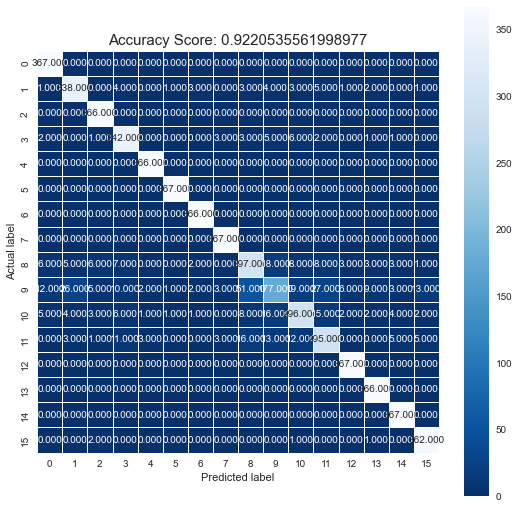

In [152]:
plt.figure(figsize=(9,9))
sns.heatmap(CM, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Our model looks good. it can be seen that most of the data have been predicted successfully

In [153]:
def clean(text):

    expanded_words = []
    for word in text.split():
        # using contractions.fix to expand the shortened words
        expanded_words.append(contractions.fix(word))

    expanded_text = ' '.join(expanded_words)

    text = expanded_text.lower()
    text = re.sub(r'[^\w\d\s]+', '', text)
    text = re.sub("[\_]+", '', text)

    return text

In [154]:
#text = "Oh ! I just remembered I read something really cool about *five hours monologue*. It’s really not that complicated. Did you know that *random fact*. Uh, interesting. Sorry, I lost track of time. Actually, I have some ideas about that. I read this really cool article recently—about how. Load faster, dammit! [directed at the Internet]. Where did I learn that? Internet. Why can’t I open a new browser tab? Oh, I’m maxed out. Which one to close…"

In [158]:
text = "Well, in order to answer your question I would have to—— Wait. Wait a second. Is that… A BUTTERFLY over there?! Holy crap! That is so pretty! I’m curious about butterflies now. I am going to spend the next 4 hours researching all about the anatomy, mating habits, and migration patterns of the butterfly. Wow, I’m halfway done with this article about their wing patterns. So cool! And it says here that—— Wait. Wait a SECOND. Is that a rabbit over there? Did I just see a rabbit?! I LOVE rabbits. I’m gonna close this tab about butterflies and now open 5 tabs about the taxonomy of rabbits in the Americas. Frick yea."

In [159]:
text_cleaned = clean(text)
text_cleaned

'well in order to answer your question i would have to wait wait a second is that a butterfly over there holy crap that is so pretty i am curious about butterflies now i am going to spend the next 4 hours researching all about the anatomy mating habits and migration patterns of the butterfly wow i am halfway done with this article about their wing patterns so cool and it says here that wait wait a second is that a rabbit over there did i just see a rabbit i love rabbits i am going to close this tab about butterflies and now open 5 tabs about the taxonomy of rabbits in the americas frick yea'

In [160]:
pred = model.predict([text_cleaned])
pred

array(['INTP'], dtype=object)

In [161]:
# save the model to disk
import pickle

filename = 'mbti_model.pkl'
pickle.dump(model, open(filename, 'wb'))

#### Later, we will use the model to create a web used to predict MBTI type of someone's typing